*Luis Antonio Ortega Andrés        
Antonio Coín Castro*

# Cuestiones previas

**Pregunta 1.** Si una función es periódica, ¿puede estar bien interpolada por un polinomio de
Hermite?

En general las funciones periódicas no pueden interpolarse bien por polinomios, ya que estos tienen un número finito de derivadas no nulas, e inevitablemente acaban siempre creciendo o decreciendo en el límite.

**Pregunta 2.** ¿En qué condiciones pensáis que un polinomio de Hermite puede interpolar bien una
función periódica?

Por ejemplo podría ser adecuado interpolar una función periódica por un cierto polinomio en un intervalo compacto, donde la función periódica está controlada.

**Pregunta 3.** ¿Qué método pensáis que podría ser mejor para implementar funciones periódicas?

Un método en el que se introdujera de alguna forma la periodicidad, por ejemplo usando una base (ortogonal) de funciones periódicas.

# Ejercicios

Hasta ahora hemos empleados polinomios para aproximar funciones, sin embargo, existen
otras bases de funciones que no son polinomios, por ejemplo, la función exponencial compleja $g(x) = e^{-2\pi ihx}$
, que, por la fórmula de Euler ($e^{it} = cos(t) + i sen(t))$ es una función periódica, siendo $h$ la frecuencia. 

Quisiéramos, por tanto, expresar una función $f$ como $f(x) = \sum_{k=-\infty}^{\infty} c_k e^{-2\pi ih_kx}$. Es posible demostrar que

$$
c_k = \int_{-\infty}^{\infty} f(x) e^{2\pi h_k x}\, dx.
$$

## Apartado 1

Considerar la función $f(x) = cos^2(x)-sin(x)$. ¿Es $f$ una función periódica?
Considerad ahora los valores de $x=i\cdot(\pi/32), \ i=0, \dots, 639$, y dibujad la función para esos valores
de x.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_puntos = 640
cte_norm = np.pi/32

# Definimos la función f y los puntos en el eje X
f = lambda x: np.cos(x)**2 - np.sin(x)
i = np.arange(n_puntos)
x= i * cte_norm

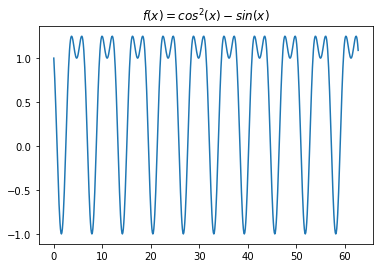

In [2]:
# Pintamos la función en los puntos que nos piden
plt.plot(x, f(x))
plt.title("$f(x)=cos^2(x)-sin(x)$")
plt.show()

La función $f$ es periódica ya que $f(x + 2\pi) = f(x)$. La periodicidad también se observa en la gráfica.

## Apartado 2

Implementad una función `coefs(f,x)` que calcule los coeficientes $c_n, n = 0, \dots, 639$
usando sumas de Riemann y tomando como valores de $h_k = \frac{32n}{640\pi}$. Es decir,
$$
c_n = \frac{\pi}{32} \sum_{k = 0}^{639} f(x_k) e^{2\pi i\frac{32n}{640\pi}x_k} = \frac{\pi}{32} \sum_{k = 0}^{639} f(x_k) e^{i\frac{n}{10}x_k}, \quad n = 0,\dots,639.
$$

In [3]:
# Definimos el segundo término del producto como función
g = lambda x, n: np.exp(1j*n/10*x)

def coefs(f, x):
    # Construimos la matriz que hay implícita en los cálculos
    matrix = np.array([[g(k,n) for k in x ] 
                               for n in range(len(x))])
    
    # El resultado es matriz * vector, normalizado
    return cte_norm * matrix @ f(x)

Pintad una gráfica con el módulo de los coeficientes (ya que pueden ser valores complejos).

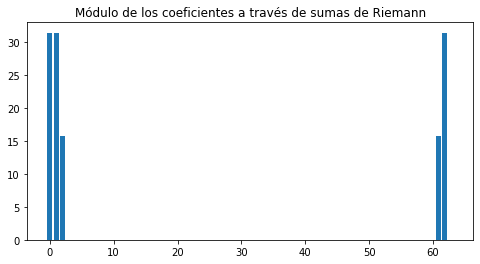

In [4]:
# Obtenemos los coeficientes en los puntos de interés
c = coefs(f, x)

# Dibujamos el módulo de los coeficientes
plt.figure(figsize=(8,4))
plt.title("Módulo de los coeficientes a través de sumas de Riemann")
plt.bar(x, np.abs(c))
plt.show()

## Apartado 3

Implementad una función `eval(coefs,x)` que implemente la fórmula de
aproximación mediante funciones periódicas, es decir,

$$
f(x) = \frac{32}{\pi}\frac{1}{640} \sum_{n=0}^{639} c_n e^{-2\pi i\frac{32n}{640\pi}x} = \frac{32}{640\pi} \sum_{n=0}^{639} c_n e^{-i\frac{n}{10}x}.
$$

*Nota*: Como estamos aproximando una función real, nos quedaremos solo con la parte real. En el marco teórico la parte imaginaria debería ser 0, pero aquí se cometen errores de redondeo que hacen que esto no sea así.

In [5]:
def eval(coefs, x):
    return (1/cte_norm) * (1/(len(coefs))) * coefs @ np.array([1/g(x,n) for n in range(len(coefs))])

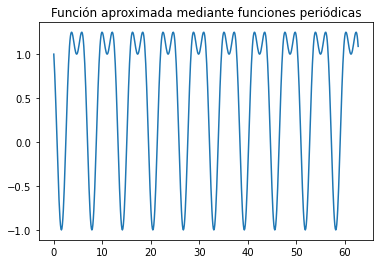

In [6]:
# Dibujamos la parte real de la función aproximada
plt.plot(x, np.real(eval(c, x)))
plt.title("Función aproximada mediante funciones periódicas")
plt.show()

Calculad el valor aproximado en los puntos $x=2.5, x=0, x=0.01, x=0.1, x=\pi$ y calculad el error
absoluto en esos puntos. Por los datos obtenidos, ¿estamos ante un método de interpolación o
de regresión?

In [7]:
# Calculamos el error absoluto en los puntos pedidos
ys = [2.5, 0, .01, .1, np.pi]
for y in ys:
    print("x =", y, "; eabs =", np.abs(f(y) - np.real(eval(c,y))))

x = 2.5 ; eabs = 0.31057809915487766
x = 0 ; eabs = 1.461053500406706e-13
x = 0.01 ; eabs = 0.25309190813732496
x = 0.1 ; eabs = 0.06244253836115132
x = 3.141592653589793 ; eabs = 7.183142969324763e-14


Vemos que se trata de un método de interpolación, ya que la función aproximada pasa por los nodos $x=0$ y $x=\pi$ (el error absoluto ahí es prácticamente 0).

# Preguntas y ejercicios opcionales

## Apartado 2

Para calcular el valor de la integral anterior hemos usado sumas de Riemann. Probad a
calcular la integral anterior mediante métodos un poco mejores, como, por ejemplo, la
regla de trapecio, o incluso un método de Gauss. ¿Obtenéis mejores aproximaciones?

In [70]:
from scipy import integrate

h = lambda x, n: f(x) * g(x,n)
x_new = [-np.pi/32] + x
# Coeficientes mediante regla del trapecio
coefs_trapz = np.array([np.trapz(h(x_new, n), x_new) for n in range(n_puntos)])

# Coeficientes mediante método de Gauss
coefs_gauss = np.array([integrate.quadrature(h, x_new[0], x_new[-1], (n,), maxiter=2000)[0] for n in range(n_puntos)])

<BarContainer object of 640 artists>

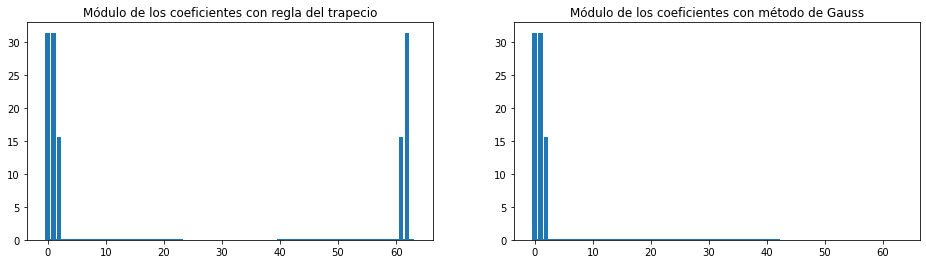

In [71]:
# Pintamos el módulo de los nuevos coeficientes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.set_title("Módulo de los coeficientes con regla del trapecio")
ax1.bar(x, np.abs(coefs_trapz))

ax2.set_title("Módulo de los coeficientes con método de Gauss")
ax2.bar(x, np.abs(coefs_gauss))

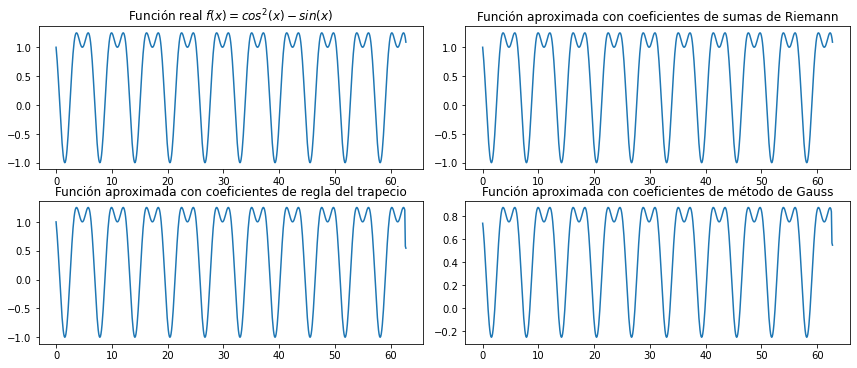

In [72]:
# Mostramos la función real y las aproximaciones
fig, axs = plt.subplots(2,2, figsize=(12,5))
plt.tight_layout()
axs[0, 0].set_title("Función real $f(x)=cos^2(x)-sin(x)$")
axs[0, 0].plot(x, f(x))

axs[0, 1].set_title("Función aproximada con coeficientes de sumas de Riemann")
axs[0, 1].plot(x, np.real(eval(c, x)))

axs[1, 0].plot(x, np.real(eval(coefs_trapz, x)))
axs[1, 0].set_title("Función aproximada con coeficientes de regla del trapecio")

axs[1, 1].set_title("Función aproximada con coeficientes de método de Gauss")
axs[1, 1].plot(x, np.real(eval(coefs_gauss, x)))

Medimos el error absoluto medio en 1000 puntos aleatorios comprendidos en $[0, \frac{639\pi}{32}]$.

In [11]:
np.random.seed(1000)
ys = np.random.uniform(low=x[0], high=x[-1], size=(1000,))
names = ["sumas de Riemann", "regla del trapecio", "método de Gauss"]
coefs = [c, coefs_trapz, coefs_gauss]

for cs, n in zip(coefs, names):
    total_err = 0
    print(f"-- Coeficientes de {n}--")
    for y in ys:
        err = np.abs(f(y) - np.real(eval(cs,y)))
        total_err += err
        #print("x =", y, "; eabs =", err)
    print("Error absoluto medio:", total_err / len(ys), "\n")

-- Coeficientes de sumas de Riemann--
Error absoluto medio: 0.4439388447166774 

-- Coeficientes de regla del trapecio--
Error absoluto medio: 0.4441519490991216 

-- Coeficientes de método de Gauss--
Error absoluto medio: 0.35577390345961235 



Vemos que en media los errores son similares entre el método de sumas de Riemann y el de la regla del trapecio. Sin embargo, el método de Gauss obtiene un error menor, por lo que diríamos que es el mejor de los tres en este aspecto. Sin embargo, cabe destacar que es el método más exigente de entre los estudiados en cuanto a tiempo de cómputo.

## Apartado 3

Aproximad ahora la función mediante Splines, Smooth Splines y polinomios de
Legendre. ¿Con cuál de los cuatro métodos obtenéis una mejor aproximación?

In [12]:
from scipy import interpolate

# Aproximamos la función con Splines
tck = interpolate.splrep(x, f(x), s=0)
f_spl = interpolate.splev(x, tck)

# Aproximamos la función con Smooth Splines
tck_smooth = interpolate.splrep(x, f(x), s=1)
f_spl_smooth = interpolate.splev(x, tck_smooth)

# Aproximamos la función con polinomios de Legendre
coefs_legendre = np.polynomial.legendre.legfit(x, f(x), 40)
f_leg = np.polynomial.legendre.legval(x, coefs_legendre)

/usr/lib/python3.8/site-packages/numpy/polynomial/legendre.py:1405: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


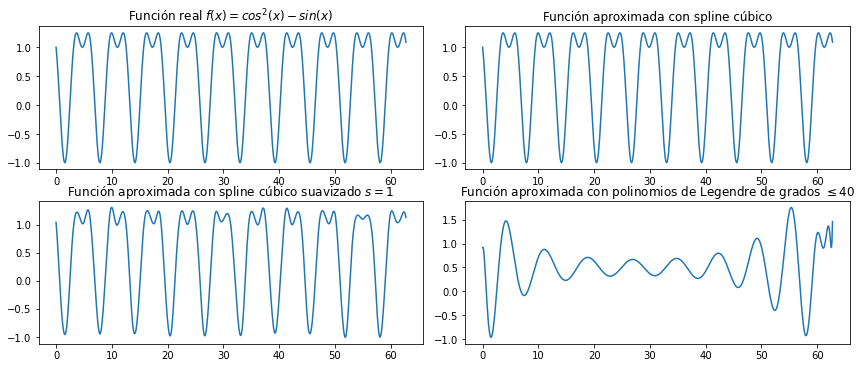

In [73]:
# Mostramos la función real y las aproximaciones
fig, axs = plt.subplots(2,2, figsize=(12,5))
plt.tight_layout()
axs[0,0].set_title("Función real $f(x)=cos^2(x)-sin(x)$")
axs[0,0].plot(x, f(x))

axs[0,1].set_title("Función aproximada con spline cúbico")
axs[0,1].plot(x, f_spl)

axs[1, 0].set_title("Función aproximada con spline cúbico suavizado $s=1$")
axs[1, 0].plot(x, f_spl_smooth)

axs[1,1].set_title("Función aproximada con polinomios de Legendre de grados $\leq 40$")
axs[1,1].plot(x, f_leg)

De nuevo, medimos el error absoluto medio en 1000 puntos aleatorios comprendidos en nuestro intervalo $[0, \frac{639\pi}{32}]$.

In [14]:
print("--Coeficientes de sumas de Riemann--")
total_err = 0
for y in ys:
    err = np.abs(f(y) - np.real(eval(c,y)))
    total_err += err
    #print("x =", y, "; eabs =", err)
print("Error absoluto medio:", total_err / len(ys))

print("\n--Spline cúbico--")
total_err = 0
for y in ys:
    err = np.abs(f(y) - interpolate.splev(y, tck))
    total_err += err
    #print("x =", y, "; eabs =", err)
print("Error absoluto medio:", total_err / len(ys))
    
print("\n--Spline cúbico suavizado--")
total_err = 0
for y in ys:
    err = np.abs(f(y) - interpolate.splev(y, tck_smooth))
    total_err += err
    #print("x =", y, "; eabs =", err)
print("Error absoluto medio:", total_err / len(ys))
    
print("\n--Polinomios de Legendre--")
total_err = 0
for y in ys:
    err = np.abs(f(y) - np.polynomial.legendre.legval(y, coefs_legendre))
    total_err += err
    #print("x =", y, "; eabs =", err)
print("Error absoluto medio:", total_err / len(ys))

--Coeficientes de sumas de Riemann--
Error absoluto medio: 0.4439388447166774

--Spline cúbico--
Error absoluto medio: 7.269207214726939e-07

--Spline cúbico suavizado--
Error absoluto medio: 0.03038134759348339

--Polinomios de Legendre--
Error absoluto medio: 0.5077675639530757


Vemos que la mejor aproximación se consigue con los splines cúbicos, que con mucha diferencia obtienen el menor error. Después le siguen los splines suavizados, y un orden de magnitud por encima se sitúa nuestra aproximación inicial mediante funciones periódicas. Los polinomios de Legendre son los que peor lo hacen, aunque no se quedan demasiado lejos del tercer puesto.